In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/corona-virus-report/covid_19_clean_complete.csv
/kaggle/input/corona-virus-report/country_wise_latest.csv
/kaggle/input/corona-virus-report/day_wise.csv
/kaggle/input/corona-virus-report/usa_county_wise.csv
/kaggle/input/corona-virus-report/worldometer_data.csv
/kaggle/input/corona-virus-report/full_grouped.csv
/kaggle/input/impact-of-covid19-pandemic-on-the-global-economy/raw_data.csv
/kaggle/input/impact-of-covid19-pandemic-on-the-global-economy/transformed_data.csv


In [2]:
import os
os.listdir('/kaggle/input/')

['corona-virus-report', 'impact-of-covid19-pandemic-on-the-global-economy']

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

covid_data = pd.read_csv('/kaggle/input/impact-of-covid19-pandemic-on-the-global-economy/raw_data.csv')

In [4]:
covid_df = pd.read_csv('/kaggle/input/impact-of-covid19-pandemic-on-the-global-economy/transformed_data.csv')

In [5]:
covid_data.head(10)

,iso_code,location,date,total_cases,total_deaths,stringency_index,population,gdp_per_capita,human_development_index,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,AFG,Afghanistan,2019-12-31,0.0,0.0,0.0,38928341,1803.987,0.498,#NUM!,#NUM!,#NUM!,17.477233,7.497754494
1,AFG,Afghanistan,2020-01-01,0.0,0.0,0.0,38928341,1803.987,0.498,#NUM!,#NUM!,#NUM!,17.477233,7.497754494
2,AFG,Afghanistan,2020-01-02,0.0,0.0,0.0,38928341,1803.987,0.498,#NUM!,#NUM!,#NUM!,17.477233,7.497754494
3,AFG,Afghanistan,2020-01-03,0.0,0.0,0.0,38928341,1803.987,0.498,#NUM!,#NUM!,#NUM!,17.477233,7.497754494
4,AFG,Afghanistan,2020-01-04,0.0,0.0,0.0,38928341,1803.987,0.498,#NUM!,#NUM!,#NUM!,17.477233,7.497754494
5,AFG,Afghanistan,2020-01-05,0.0,0.0,0.0,38928341,1803.987,0.498,#NUM!,#NUM!,#NUM!,17.477233,7.497754494
6,AFG,Afghanistan,2020-01-06,0.0,0.0,0.0,38928341,1803.987,0.498,#NUM!,#NUM!,#NUM!,17.477233,7.497754494
7,AFG,Afghanistan,2020-01-07,0.0,0.0,0.0,38928341,1803.987,0.498,#NUM!,#NUM!,#NUM!,17.477233,7.497754494
8,AFG,Afghanistan,2020-01-08,0.0,0.0,0.0,38928341,1803.987,0.498,#NUM!,#NUM!,#NUM!,17.477233,7.497754494
9,AFG,Afghanistan,2020-01-09,0.0,0.0,0.0,38928341,1803.987,0.498,#NUM!,#NUM!,#NUM!,17.477233,7.497754494


In [6]:
covid_df.head(10)

,CODE,COUNTRY,DATE,HDI,TC,TD,STI,POP,GDPCAP
0,AFG,Afghanistan,2019-12-31,0.498,0.0,0.0,0.0,17.477233,7.497754
1,AFG,Afghanistan,2020-01-01,0.498,0.0,0.0,0.0,17.477233,7.497754
2,AFG,Afghanistan,2020-01-02,0.498,0.0,0.0,0.0,17.477233,7.497754
3,AFG,Afghanistan,2020-01-03,0.498,0.0,0.0,0.0,17.477233,7.497754
4,AFG,Afghanistan,2020-01-04,0.498,0.0,0.0,0.0,17.477233,7.497754
5,AFG,Afghanistan,2020-01-05,0.498,0.0,0.0,0.0,17.477233,7.497754
6,AFG,Afghanistan,2020-01-06,0.498,0.0,0.0,0.0,17.477233,7.497754
7,AFG,Afghanistan,2020-01-07,0.498,0.0,0.0,0.0,17.477233,7.497754
8,AFG,Afghanistan,2020-01-08,0.498,0.0,0.0,0.0,17.477233,7.497754
9,AFG,Afghanistan,2020-01-09,0.498,0.0,0.0,0.0,17.477233,7.497754


In [7]:
covid_data.dtypes

iso_code                    object
location                    object
date                        object
total_cases                float64
total_deaths               float64
stringency_index           float64
population                   int64
gdp_per_capita             float64
human_development_index    float64
Unnamed: 9                  object
Unnamed: 10                 object
Unnamed: 11                 object
Unnamed: 12                float64
Unnamed: 13                 object
dtype: object

In [8]:
covid_df['COUNTRY'].value_counts()

Afghanistan        294
Indonesia          294
Macedonia          294
Luxembourg         294
Lithuania          294
                  ... 
Tajikistan         172
Comoros            171
Lesotho            158
Hong Kong           51
Solomon Islands      4
Name: COUNTRY, Length: 210, dtype: int64

In [9]:
covid_df.groupby('COUNTRY').sum()

,HDI,TC,TD,STI,POP,GDPCAP
COUNTRY,,,,,,
Afghanistan,146.412,2000.646094,1226.948181,896.603996,5138.306531,2204.339821
Albania,176.625,1702.240756,929.368800,883.653354,3346.320751,2109.632744
Algeria,221.676,2052.510847,1406.216387,939.379534,5173.314864,2804.947935
Andorra,193.908,1465.828250,786.655112,787.230267,2543.629175,0.000000
Angola,123.172,1203.978763,590.138675,871.874556,3669.286969,1837.821379
...,...,...,...,...,...,...
Venezuela,166.659,1810.819461,853.054819,951.310992,3758.733026,2129.962529
Vietnam,204.036,1450.458104,261.537218,1090.995318,5407.749567,2565.961269
Yemen,87.236,1163.307314,928.044676,696.652964,3321.701766,1408.749624


Checking for the most Occured Country

In [10]:
covid_df['COUNTRY'].value_counts().mode()

0    294
dtype: int64

In [11]:
code = list(covid_df["CODE"].unique())
country = list(covid_df["COUNTRY"].unique())

In [12]:
population = covid_df["POP"].unique().tolist()

In [13]:
# Aggregating the data

hdi = []
tc = []
td = []
sti = []
gdp = []

for i in country:
    hdi.append(covid_df.loc[covid_df['COUNTRY'] == i, 'HDI'].sum() / 294)
    tc.append((covid_data.loc[covid_data["location"] == i, "total_cases"]).sum())
    td.append((covid_data.loc[covid_data["location"] == i, "total_deaths"]).sum())
    sti.append((covid_df.loc[covid_df["COUNTRY"] == i, "STI"]).sum()/294)
    population.append((covid_data.loc[covid_data["location"] == i, "population"]).sum()/294)
    

In [14]:
aggregated_df = pd.DataFrame(list(zip(code, country, hdi, tc, td, sti, population)), columns=["Country Code", "Country", "HDI", 
                                          "Total Cases", "Total Deaths", 
                                          "Stringency Index", "Population"])

In [15]:
aggregated_df.head()

,Country Code,Country,HDI,Total Cases,Total Deaths,Stringency Index,Population
0,AFG,Afghanistan,0.498000,5126433.0,165875.0,3.049673,17.477233
1,ALB,Albania,0.600765,1071951.0,31056.0,3.005624,14.872537
2,DZA,Algeria,0.754000,4893999.0,206429.0,3.195168,17.596309
3,AND,Andorra,0.659551,223576.0,9850.0,2.677654,11.254996
4,AGO,Angola,0.418952,304005.0,11820.0,2.965560,17.307957


In [16]:
# Sorting Data According to Total Cases

aggregated_df.sort_values('Total Cases', ascending=False)

,Country Code,Country,HDI,Total Cases,Total Deaths,Stringency Index,Population
200,USA,United States,0.924000,746014098.0,26477574.0,3.350949,19.617637
27,BRA,Brazil,0.759000,425704517.0,14340567.0,3.136028,19.174732
90,IND,India,0.640000,407771615.0,7247327.0,3.610552,21.045353
157,RUS,Russia,0.816000,132888951.0,2131571.0,3.380088,18.798668
150,PER,Peru,0.599490,74882695.0,3020038.0,3.430126,17.311165
...,...,...,...,...,...,...,...
204,VAT,Vatican,0.000000,2415.0,0.0,0.000000,6.695799
130,MSR,Montserrat,0.000000,2383.0,177.0,2.477077,8.516993
5,AIA,Anguilla,0.000000,614.0,0.0,2.326181,9.615939
173,SLB,Solomon Islands,0.007429,11.0,0.0,0.000000,13.439912


**This shows that USA recorded the highest Covid19 Cases**

In [17]:
# Sorting Data According to Total Death
aggregated_df.sort_values('Total Deaths', ascending=False)

,Country Code,Country,HDI,Total Cases,Total Deaths,Stringency Index,Population
200,USA,United States,0.924000,746014098.0,26477574.0,3.350949,19.617637
27,BRA,Brazil,0.759000,425704517.0,14340567.0,3.136028,19.174732
125,MEX,Mexico,0.774000,74347548.0,7295850.0,3.019289,18.674802
199,GBR,United Kingdom,0.922000,59475032.0,7249573.0,3.353883,18.033340
90,IND,India,0.640000,407771615.0,7247327.0,3.610552,21.045353
...,...,...,...,...,...,...,...
159,KNA,Saint Kitts and Nevis,0.550422,3246.0,0.0,0.000000,10.881663
160,LCA,Saint Lucia,0.556439,4450.0,0.0,0.000000,12.120673
161,VCT,Saint Vincent and the Grenadines,0.531184,7824.0,0.0,0.000000,11.616808
167,SYC,Seychelles,0.593684,14701.0,0.0,2.548670,11.496186


In [18]:
aggregated_df['Total Cases'].sum() # Total CASES 

3133760956.0

In [19]:
aggregated_df['Total Deaths'].sum() #Total Deaths

116851104.0

In [20]:
figure = px.bar(aggregated_df, x='Country', y='Total Cases',
            title="Countries with Highest Deaths")

In [21]:
figure.show()

In [22]:
data = aggregated_df.sort_values(by=["Total Cases"], ascending=False)
print(data.head())

    Country Code        Country      HDI  Total Cases  Total Deaths  \
200          USA  United States  0.92400  746014098.0    26477574.0   
27           BRA         Brazil  0.75900  425704517.0    14340567.0   
90           IND          India  0.64000  407771615.0     7247327.0   
157          RUS         Russia  0.81600  132888951.0     2131571.0   
150          PER           Peru  0.59949   74882695.0     3020038.0   

     Stringency Index  Population  
200          3.350949   19.617637  
27           3.136028   19.174732  
90           3.610552   21.045353  
157          3.380088   18.798668  
150          3.430126   17.311165  


A plot of the highest countries with Total Cases  

In [23]:
figure = px.bar(data.head(10), x='Country', y='Total Cases',
            title="Countries with Highest Deaths")
figure.show()

In [24]:
figure = px.bar(data.head(20), x='Country', y='Total Cases',
            title="Countries with Highest Deaths")
figure.show()

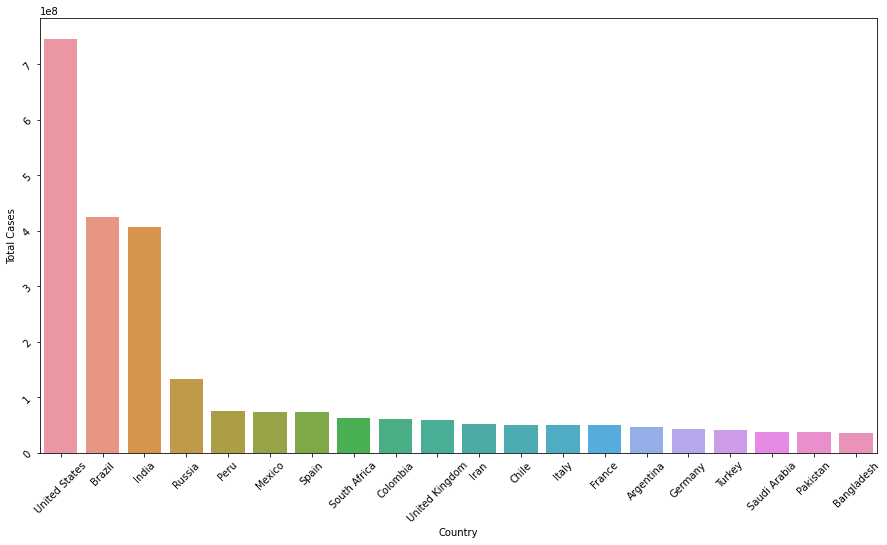

In [25]:
from matplotlib import pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,8))
ax = sns.barplot(x="Country", y="Total Cases", data=data.head(20))
ax.tick_params(labelrotation=45)

In [26]:
figure = px.bar(data.head(20), x='Country', y='Total Deaths',
            title="Countries with Highest Deaths")
figure.update_layout(xaxis_tickangle=-45)
figure.show()

In [27]:
fig = go.Figure()
fig.add_trace(go.Bar(
    x=data.head(20)["Country"],
    y=data.head(20)["Total Cases"],
    name='Total Cases',
    marker_color='indianred'
))
fig.add_trace(go.Bar(
    x=data.head(20)["Country"],
    y=data.head(20)["Total Deaths"],
    name='Total Deaths',
    marker_color='lightblue'
))
fig.update_layout(barmode='group', xaxis_tickangle=-45)
fig.show()

In [28]:
# Percentage of Total Cases and Deaths in a Pie Chart Representation 
cases = data["Total Cases"].sum()
deceased = data["Total Deaths"].sum()

labels = ["Total Cases", "Total Deaths"]
values = [cases, deceased]
print(cases, deceased)

fig = px.pie(data, values=values, labels=labels, title='Percentage Total Cases and Deaths')
fig.show()

3133760956.0 116851104.0


In [29]:
death_rate = (data["Total Deaths"].sum() / data["Total Cases"].sum()) * 100
print("Death Rate = ", death_rate)

Death Rate =  3.728781666523514


In [30]:
fig = px.bar(data.head(20), x='Country', y='Total Cases',
             hover_data=['Population', 'Total Deaths', 'Total Cases'], 
             color='Stringency Index', height=500, 
             title= "Stringency Index during Covid-19")
fig.show()

In [31]:
cases = data["Total Cases"].sum()
deceased = data["Total Deaths"].sum()

labels = ["Total Cases", "Total Deaths"]
values = [cases, deceased, population]

fig = px.pie(data.head(20), values=values, labels=labels, title='Percentage Total Cases and Deaths')
fig.show()

In [32]:
fig = px.pie(data.head(20), 
             values='Total Cases', names='Country', 
             title='Population of Total Recorded cases among the first top 20 Countries',
            hover_data=['Country'])
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

In [33]:
# Adding the GDP per capita before Covid-19, GDP per capita during Covid-19 to this dataset

#Adding to the first 10 only
data2 = data.head(10)
data2["GDP Before Covid"] = [61280.39, 8551.21, 2100.75, 
                            11497.65, 7027.61, 9946.03, 
                            29564.74, 6001.40, 6424.98, 42354.41]
data2["GDP During Covid"] = [58060.31, 8228.77, 1900.71, 
                            10126.72, 6126.87, 8346.70, 
                            27057.16, 5090.72, 5332.77, 40284.64]

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [34]:
data2

,Country Code,Country,HDI,Total Cases,Total Deaths,Stringency Index,Population,GDP Before Covid,GDP During Covid
200,USA,United States,0.924000,746014098.0,26477574.0,3.350949,19.617637,61280.39,58060.31
27,BRA,Brazil,0.759000,425704517.0,14340567.0,3.136028,19.174732,8551.21,8228.77
90,IND,India,0.640000,407771615.0,7247327.0,3.610552,21.045353,2100.75,1900.71
157,RUS,Russia,0.816000,132888951.0,2131571.0,3.380088,18.798668,11497.65,10126.72
150,PER,Peru,0.599490,74882695.0,3020038.0,3.430126,17.311165,7027.61,6126.87
125,MEX,Mexico,0.774000,74347548.0,7295850.0,3.019289,18.674802,9946.03,8346.70
178,ESP,Spain,0.887969,73717676.0,5510624.0,3.393922,17.660427,29564.74,27057.16
175,ZAF,South Africa,0.608653,63027659.0,1357682.0,3.364333,17.898266,6001.40,5090.72
42,COL,Colombia,0.581847,60543682.0,1936134.0,3.357923,17.745037,6424.98,5332.77
199,GBR,United Kingdom,0.922000,59475032.0,7249573.0,3.353883,18.033340,42354.41,40284.64


In [35]:
fig = px.bar(data2, x='Country', y='Total Cases',
             hover_data=['Population', 'Total Deaths', 'Total Cases'], 
             color='GDP Before Covid', height=500, 
             title= "GDP Per Capita Before Covid-19")
fig.show()

In [36]:
fig = px.bar(data2, x='Country', y='Total Cases',
             hover_data=['Population', 'Total Deaths', 'Total Cases'], 
             color='GDP During Covid', height=500, 
             title= "GDP Per Capita During Covid-19")
fig.show()

**Checking the Decrease Of GDP Before and During Covid**

In [37]:
fig = go.Figure()
fig.add_trace(go.Bar(
    x=data2["Country"],
    y=data2["GDP Before Covid"],
    name='GDP Before Covid',
    marker_color='indianred'
))
fig.add_trace(go.Bar(
    x=data2["Country"],
    y=data2["GDP During Covid"],
    name='GDP During Covid',
    marker_color='lightblue'
))
fig.update_layout(barmode='group', xaxis_tickangle=-45)
fig.show()

In [38]:
fig = px.bar(data2, x='Country', y='Total Cases',
             hover_data=['Population', 'Total Deaths', 'Total Cases'], 
             color='HDI', height=500, 
             title= "Human Development Index during Covid-19")
fig.show()

In this task, we studied the spread of covid-19 among the countries and its impact on the global economy. We saw that the outbreak of covid-19 resulted in the highest number of covid-19 cases and deaths in the united states.**